2025 CCADD Winter Internship - Book Reading Session
#### ***Copyright Notice***

This notebook was created as part of an internship program for educational and non-commercial purposes. It is based on content from *R for Data Science* (2nd edition) by Hadley Wickham, Mine Cetinkaya-Rundel, and Garrett Grolemund. The original book is licensed under the Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License. 

This notebook is not a substitute for the original book, and participants are encouraged to refer to the official publication for comprehensive understanding. 

© Nayoung Ku, 2025. All rights reserved. Redistribution of this notebook is permitted for educational purposes only with proper attribution.

# Chapter 10: Exploratory Data Analysis

* https://r4ds.hadley.nz/eda

> "You ask question about whether your data meets your expectation."

EDA highlights **creativity** to generate a ***large quantity of questions in good quality***.
You have to keep asking **"why"** throughout the whole process.

The tools of EDA are as follows:  
* **visualization**,
* **transformation**,
* **modeling**

There is no specific rule for making a question, but there are some routines that data scientists usually do.

In this chapter, we use the `diamond` dataset to learn how to explore the data and extract useful discoveries within it.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


## 1. Variation
: differences *within* a variable's values

Variation is the tendency of the values of a variable to change from measurement to measurement. 

Understanding variation is crucial for data analysis, as it helps **identify patterns**, **anomalies**, and the **overall distribution** of data.

#### Key Points:

* **Distribution Analysis**: Examining the distribution of a variable's values is essential to understand its variation. This can be visualized using histograms, boxplots, or density plots.

* **Identifying Anomalies**: By analyzing variation, one can detect outliers or unusual observations that may require further investigation.

* **Data Transformation**: Understanding variation aids in deciding whether data transformations are necessary to meet the assumptions of statistical models.

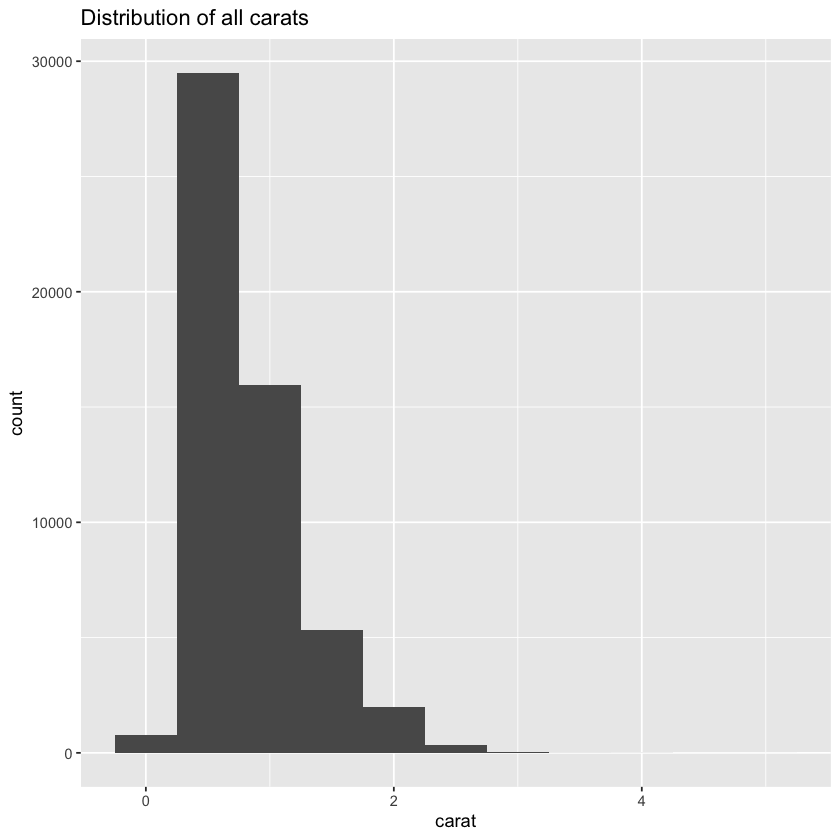

In [3]:
ggplot(diamonds) + 
    geom_histogram(aes(x = carat), binwidth = 0.5) + 
    ggtitle("Distribution of all carats") 

*#Right skewed*

Follow-up questions:
> * Which values are **the most common?** + WHY?
> * Which values are **rare**? + Does that match your expectations?
> * Are there any **unusual patterns**? + What might explain them?

In [4]:
summary(diamonds['carat']) # or summary(diamonds$carat) 

     carat       
 Min.   :0.2000  
 1st Qu.:0.4000  
 Median :0.7000  
 Mean   :0.7979  
 3rd Qu.:1.0400  
 Max.   :5.0100  

### 1.1. Typical Values

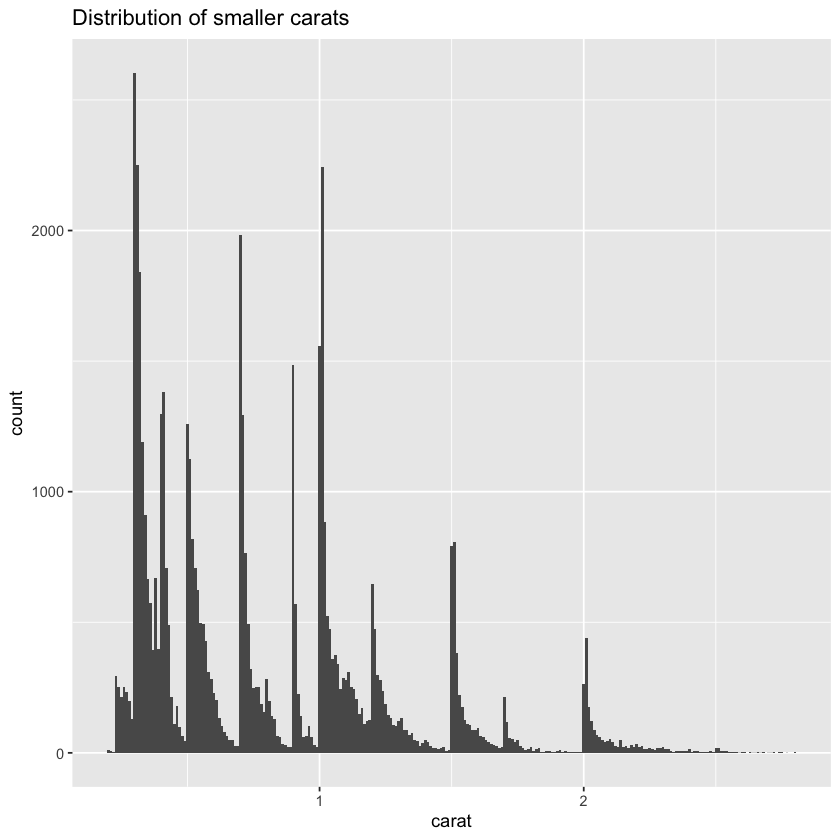

In [5]:
# Visualization of `carat` distribution for smaller diamonds  
smaller <- diamonds |> 
    filter(carat < 3)

ggplot(smaller, aes(x = carat)) + 
    geom_histogram(binwidth = 0.01) + 
    ggtitle("Distribution of smaller carats") 

* *#Right_skewed_in_each_group*
* *0.5, 1, 1.5, 2*
* *#Clustered* -> *#Subgroups*

In [6]:
summary(smaller['carat'])

     carat       
 Min.   :0.2000  
 1st Qu.:0.4000  
 Median :0.7000  
 Mean   :0.7961  
 3rd Qu.:1.0400  
 Max.   :2.8000  

> * Why are there more diamonds at whole carats (i.e., 1.0, 2.0) and common fractions of carats (i.e., 0.25, 0.5, 1.5)
> * Why are there more diamonds slightly to the right of each peak?

Questions to understand the subgroups:
> * How are the observations within each subgroup similar to each group similar to each other?
> * How are the observations in separate clusters different from each other?
> * How can you explain or describe the clusters?
> * Why might the appearance of clusters be misleading?

### 1.2. Unusual Values

* **Outliers**: unusual observations; data points that don't seem to fit the pattern
    * They might be due to data **entry errors**, **extremes** of the data collection, or **new discoveries**, etc.

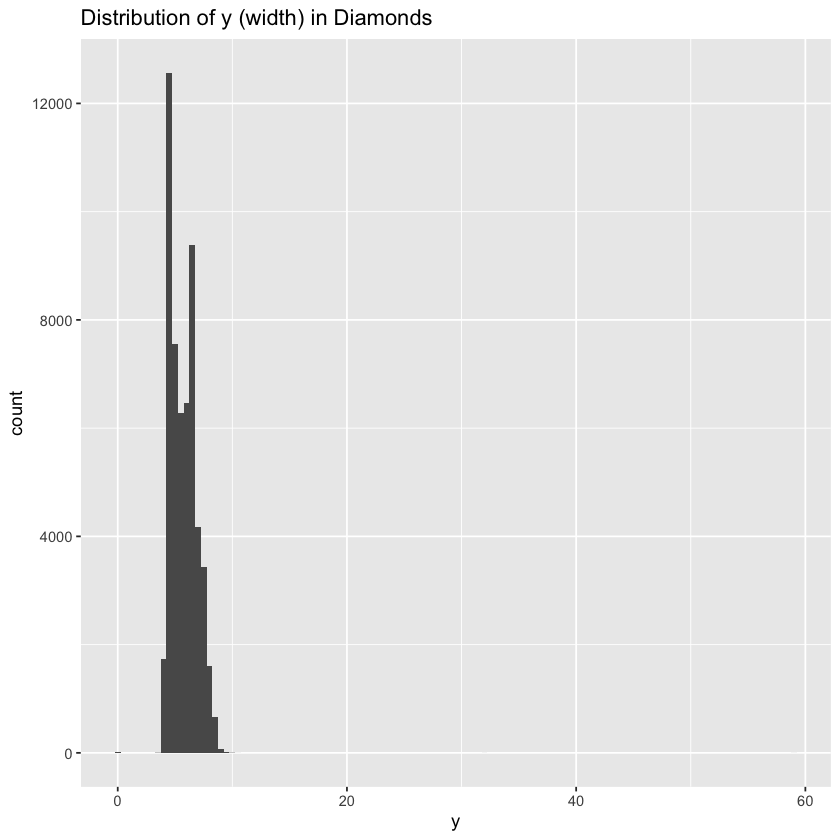

In [7]:
# Distribution of 'y' variable
ggplot(diamonds, aes(x = y)) +
  geom_histogram(binwidth = 0.5) +
  labs(title = "Distribution of y (width) in Diamonds")

In this plot, you cannot see values larger than 10.0, but you know their existence because R automatically considers all the values, meaning their counts are so small.
Thus, to make it easy to see the count of larger `y` values, we need to zoom.
* `coord_cartesian()` has `xlim` & `ylim` arguments to zoom in

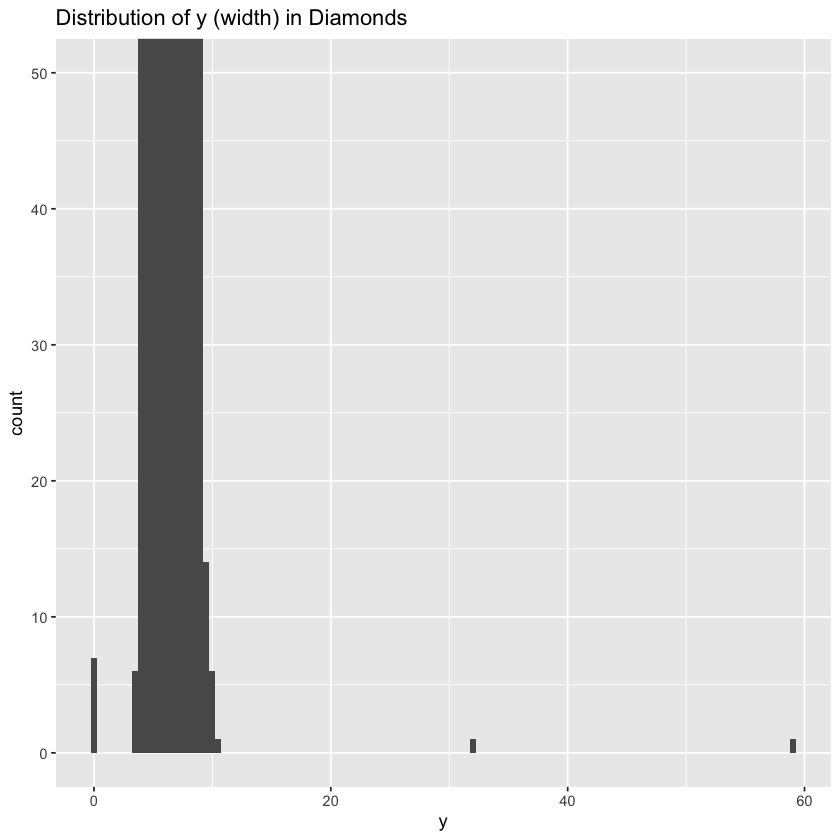

In [8]:
# Distribution of 'y' variable
ggplot(diamonds, aes(x = y)) +
    geom_histogram(binwidth = 0.5) +
    coord_cartesian(ylim = c(0, 50)) + 
    labs(title = "Distribution of y (width) in Diamonds")

In [9]:
unusual <- diamonds |>
    filter(y <3 | y > 20) |>
    select(price, x, y, z) |>
    arrange(y)

unusual

price,x,y,z
<int>,<dbl>,<dbl>,<dbl>
5139,0.00,0.0,0.00
6381,0.00,0.0,0.00
12800,0.00,0.0,0.00
15686,0.00,0.0,0.00
18034,0.00,0.0,0.00
2130,0.00,0.0,0.00
2130,0.00,0.0,0.00
2075,5.15,31.8,5.12
12210,8.09,58.9,8.06


In [10]:
summary(diamonds["price"])

     price      
 Min.   :  326  
 1st Qu.:  950  
 Median : 2401  
 Mean   : 3933  
 3rd Qu.: 5324  
 Max.   :18823  

1. We know that diamonds cannot have a width of 0mm, so these values must be incorrect.
    * That means the `NA`s or missing data were coded as 0.
    * We can re-code these values as `NA`s to prevent misleading calculation
2. We can suspect the prices of width 32mm & 59mm diamonds: they are more than an inch long but too cheap!!

2 Options to move on:
> 1. Drop the entire row with strange values
> 2. Replace the unusual values with missing values (Recommended)

`if_else(<CONDITION>, true, false, missing = NULL)`:
* `true`: return value if the value is `TRUE` in the`CONDITION`
* `false`: return value if the value is `FALSE` in the`CONDITION`

In [11]:
# 2. Replace the unusual values with missing values (Recommended)
diamonds2 <- diamonds |>
    mutate(y = if_else(y < 3 | y > 20, NA, y))
diamonds2 |> 
    filter(is.na(y))

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.00,Very Good,H,VS2,63.3,53,5139,0.00,NA,0.00
1.14,Fair,G,VS1,57.5,67,6381,0.00,NA,0.00
2.00,Premium,H,SI2,58.9,57,12210,8.09,NA,8.06
1.56,Ideal,G,VS2,62.2,54,12800,0.00,NA,0.00
1.20,Premium,D,VVS1,62.1,59,15686,0.00,NA,0.00
2.25,Premium,H,SI2,62.8,59,18034,0.00,NA,0.00
0.51,Ideal,E,VS1,61.8,55,2075,5.15,NA,5.12
0.71,Good,F,SI2,64.1,60,2130,0.00,NA,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,NA,0.00


In [12]:
sum(is.na(diamonds2$y))

[1] 9

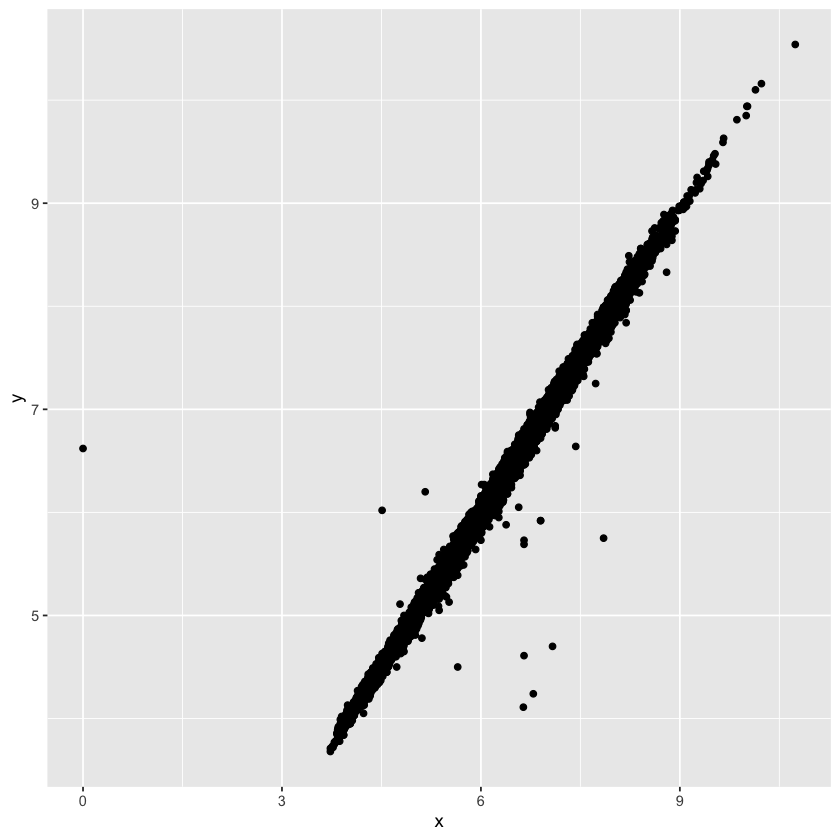

In [13]:
ggplot(diamonds2, aes(x = x, y = y)) + 
    geom_point(na.rm = TRUE) # `na.rm = TRUE` is set to suppress the warning due to NA values in 9 rows

In [14]:
# install.packages("nycflights13")
library(nycflights13)

In [15]:
View(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [16]:
# Sometimes NA is critical to understand the data 
flights_mutated <- nycflights13::flights |>
    mutate(
        cancelled = is.na(dep_time), # For this dataset, NA in dep_time indicates that the flight is cancelled.
        sched_hour = sched_dep_time %/% 100,
        sched_min = sched_dep_time %% 100,
        sched_dep_time = sched_hour + (sched_min / 60)
    ) 

head(flights_mutated) 

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,origin,dest,air_time,distance,hour,minute,time_hour,cancelled,sched_hour,sched_min
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<lgl>,<dbl>,<dbl>
2013,1,1,517,5.250000,2,830,819,11,UA,⋯,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,FALSE,5,15
2013,1,1,533,5.483333,4,850,830,20,UA,⋯,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,FALSE,5,29
2013,1,1,542,5.666667,2,923,850,33,AA,⋯,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,FALSE,5,40
2013,1,1,544,5.750000,-1,1004,1022,-18,B6,⋯,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,FALSE,5,45
2013,1,1,554,6.000000,-6,812,837,-25,DL,⋯,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,FALSE,6,0
2013,1,1,554,5.966667,-4,740,728,12,UA,⋯,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,FALSE,5,58


* `%/%` (Modulo): an operator gives the remainder of the division of two numbers.
* `%%` (Integer Division):  an operator performs integer division, giving the quotient without the fractional part.

## 2. Covariation
* Covariation describes the behavior *between* variables.
* Covariation is the tendency for the values of two or more variables to vary together in a related way.

### 2.1. A Categorical and a Numerical Variable

* `price` (numerical variable) & `cut` (or quality; categorial variable)
    * `cut` is defined as an ordered factor variable. 

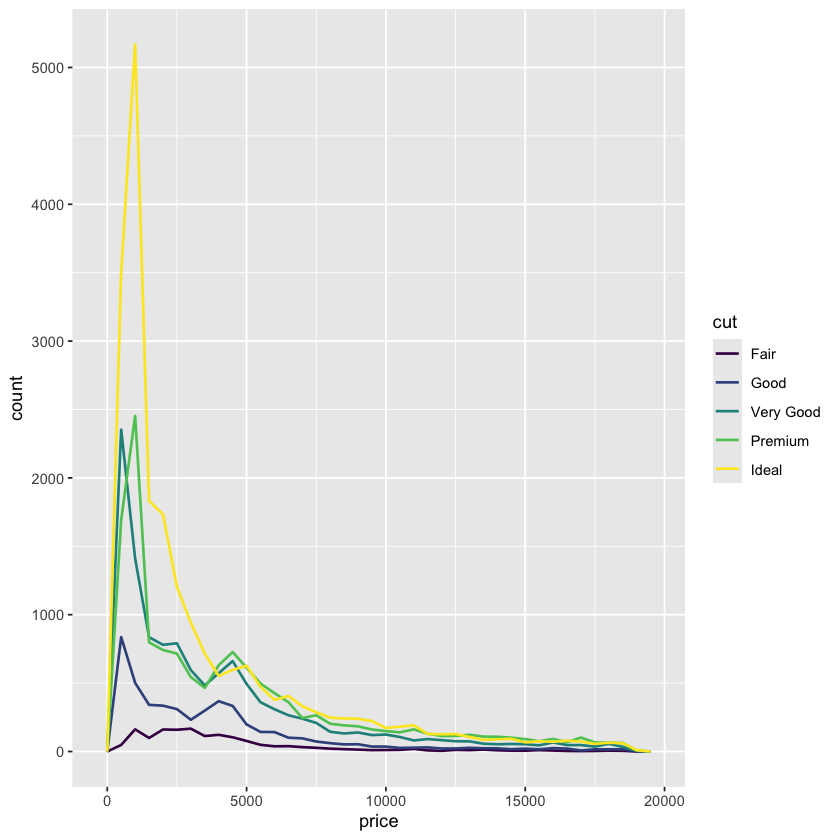

In [17]:
ggplot(diamonds) +
    geom_freqpoly(aes(x = price, color = cut), binwidth = 500, linewidth=0.75)

* To compare the group, count might not be the best option.
* Normalization by density is required.
    * `y = after_stat(density)`: Normalized value by dividing the frequency of each section by the total number of data
    * Summation of `density` is 1, indicating the relative distribution of the data.

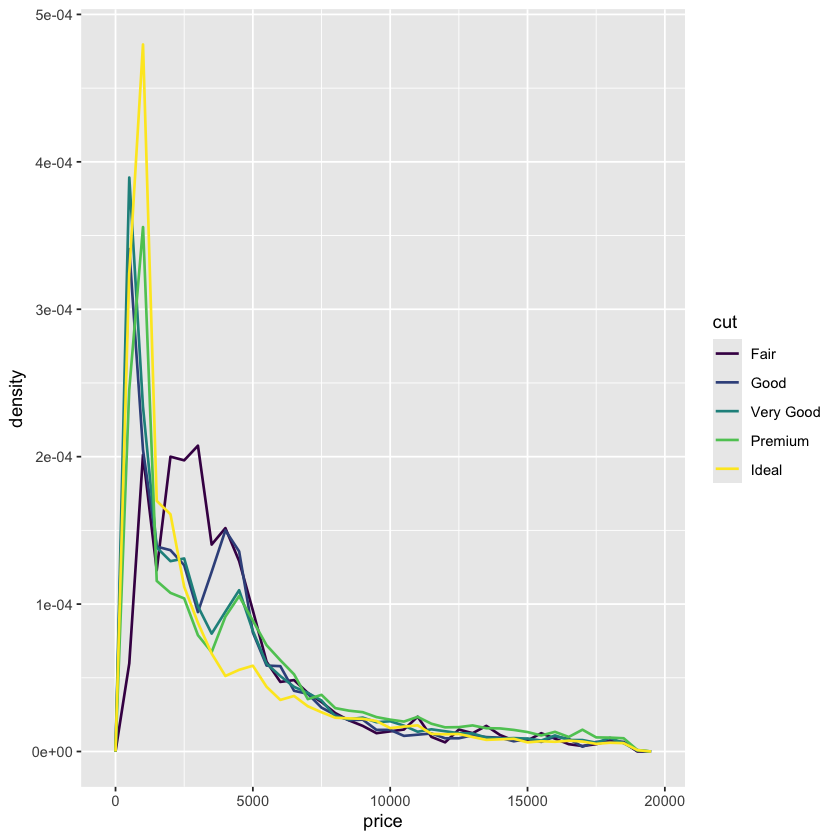

In [18]:
ggplot(diamonds) +
    geom_freqpoly(aes(x = price, y = after_stat(density), color = cut), binwidth = 500, linewidth=0.75)

* Does it mean fair diamonds (the lowest quality) have the highest average price?

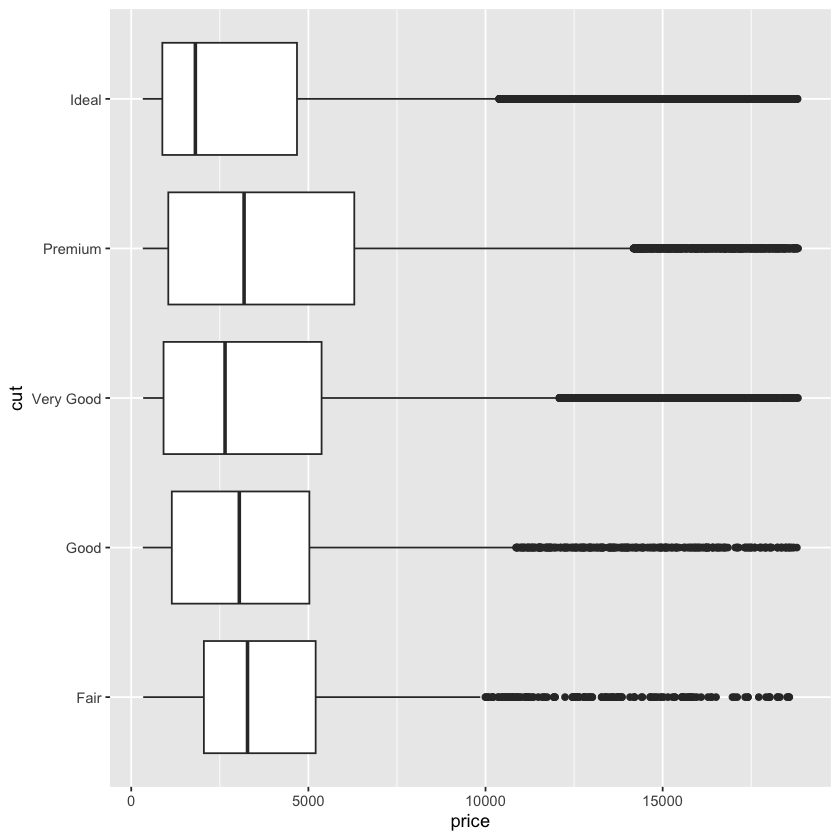

In [19]:
ggplot(diamonds) +
    geom_boxplot(aes(x = cut, y = price)) + 
    coord_flip()

Better quality diamonds are typically cheaper

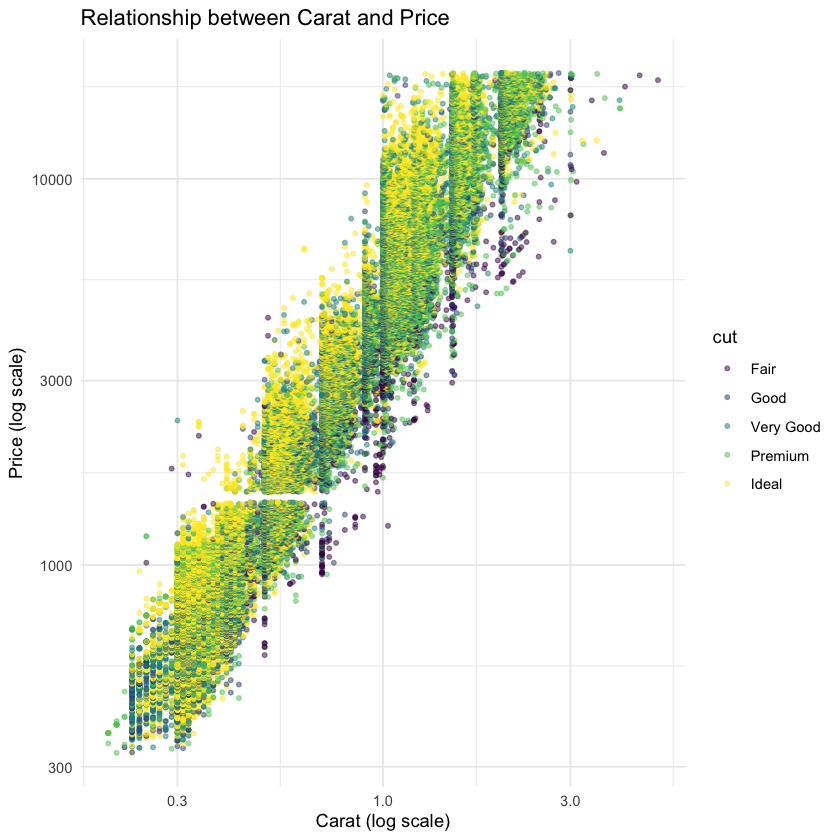

In [20]:
ggplot(diamonds, aes(x = carat, y = price, color = cut)) +
  geom_point(alpha = 0.5, size = 1) +
  scale_x_log10() + # Log scale for x-axis (Carat)
  scale_y_log10() + # Log scale for y-axis (Price)
  labs(
    title = "Relationship between Carat and Price",
    x = "Carat (log scale)",
    y = "Price (log scale)"
  ) +
  theme_minimal()

### 2.2. Two Categorical Variables

Count the number of observations for each combination of levels of these categorical variables.

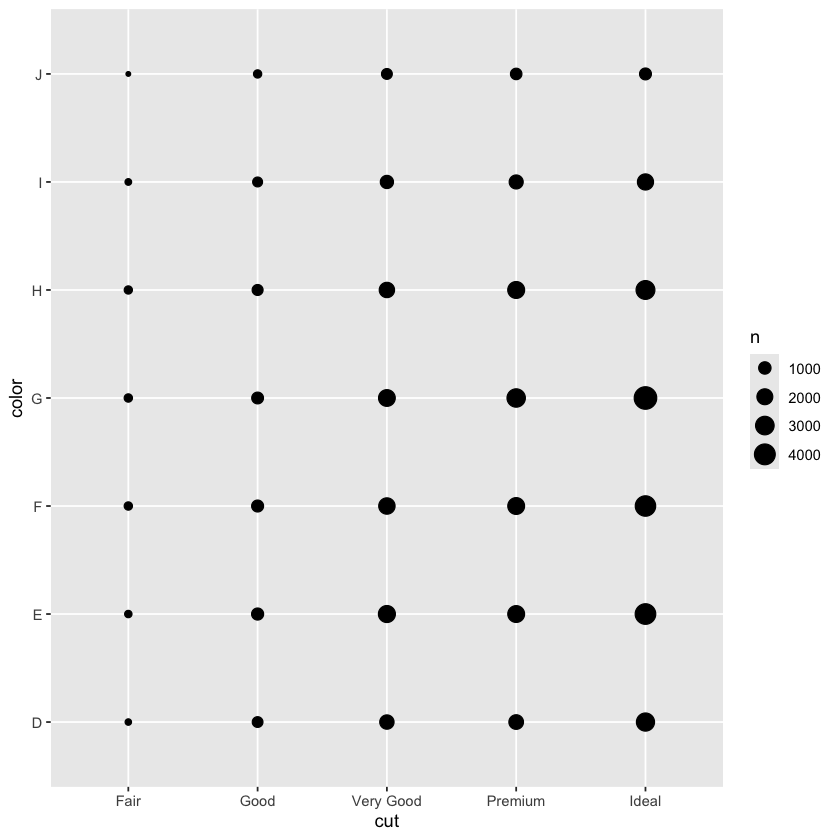

In [21]:
## ggplot2's `geom_count()`
ggplot(diamonds, aes(x = cut, y = color)) +
    geom_count()

The size of each circle in the plot displays how many observations occurred at each combination of values.

In [22]:
# dplyr
diamonds |> 
    count(color, cut) |>
    arrange(desc(n)) |>
    head(10)

color,cut,n
<ord>,<ord>,<int>
G,Ideal,4884
E,Ideal,3903
F,Ideal,3826
H,Ideal,3115
G,Premium,2924
D,Ideal,2834
E,Very Good,2400
H,Premium,2360
E,Premium,2337


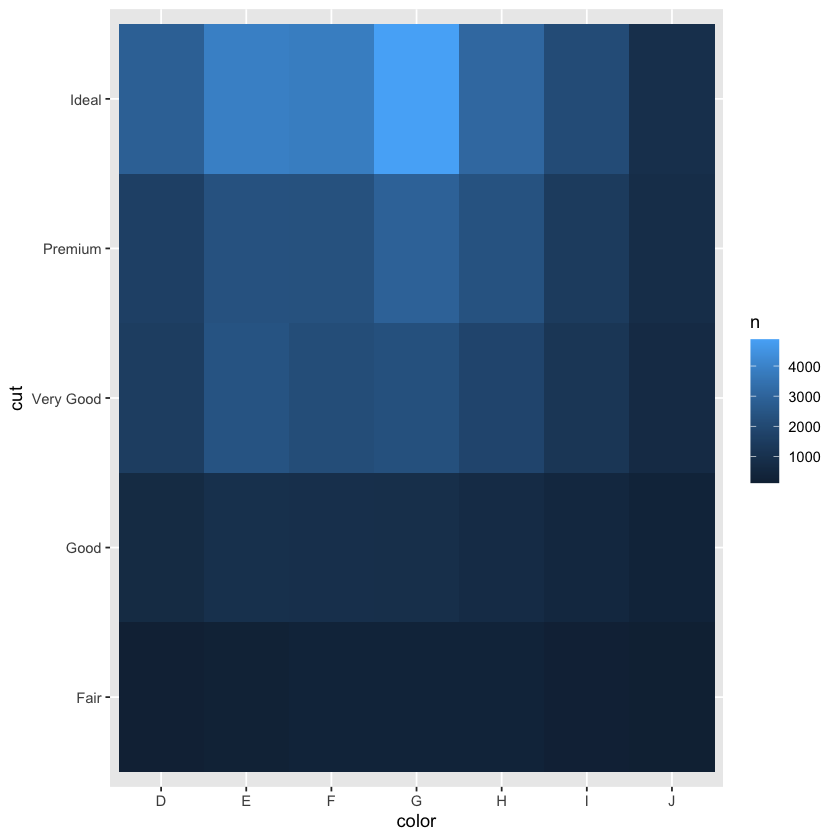

In [23]:
# `geom_tile`
diamonds |> 
  count(color, cut) |>  
  ggplot() +
  geom_tile(aes(x = color, y = cut, fill = n))

### 2.3. Two Numerical Variables

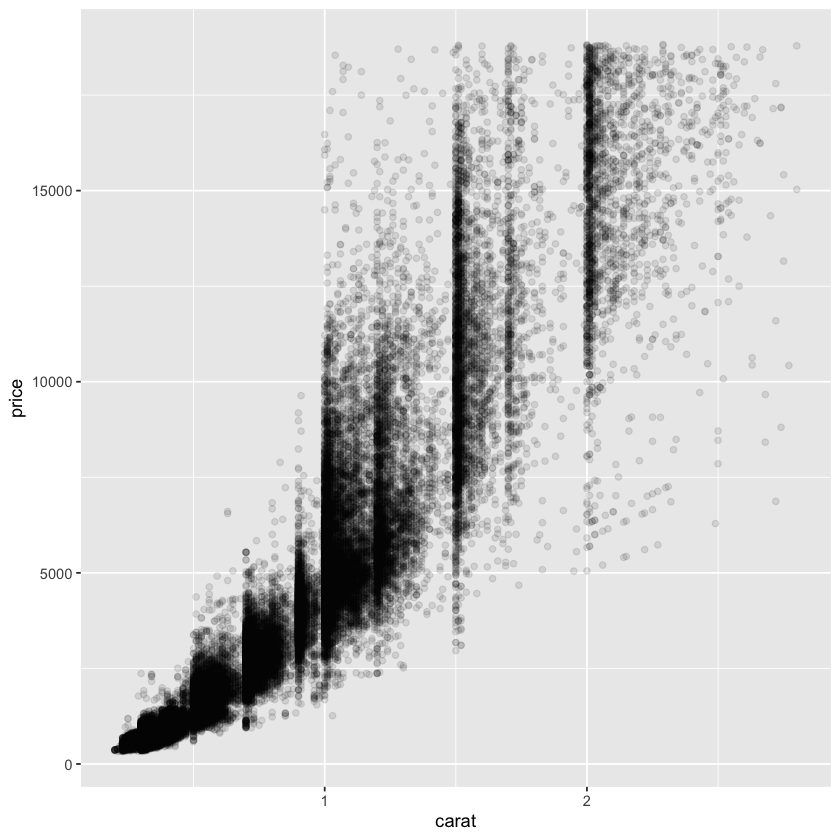

In [24]:
ggplot(smaller) +
  geom_point(aes(x = carat, y = price), alpha = 0.1)

Bin one continuous variable (`carat`) so it acts like a categorical variable

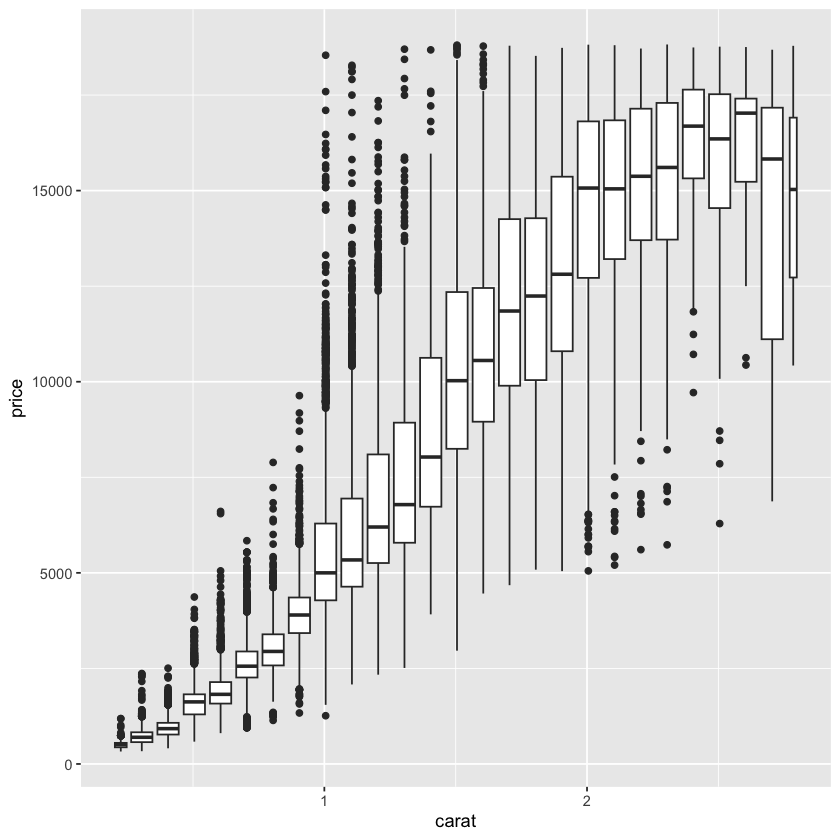

In [25]:
ggplot(smaller) + 
    geom_boxplot(aes(x = carat, y = price,
                     group = cut_width(carat, 0.1))) # cut_width(x, width)

### 2.4. Patterns & Models

**Patterns**:

If a systematic relationship exists between two variables it will appear as a pattern in the data.
> * Could this pattern be due to randomness
> * How can you describe the relationship implied by the pattern?
> * How strong does the pattern imply the relationship?
> * Does the relationship change if you look at individual subgroups of the data or other variables?

If you think of variation as a phenomenon that creates uncertainty, covariation is a phenomenon that reduces it.

**Models:**

Models are a tool for extracting patterns out of data.
It’s possible to use a model to remove the very strong relationship between price and carat so we can explore the subtleties that remain.

In [26]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



Log transform the values of `carat` & `price` first, and fit a model to the log-transformed values.

In [27]:
diamonds <- diamonds |>
  mutate(
    log_price = log(price),
    log_carat = log(carat)
  )

View(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,5.786897,-1.469676
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,5.786897,-1.560648
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,5.789960,-1.469676
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,5.811141,-1.237874
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,5.814131,-1.171183
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,5.817111,-1.427116
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47,5.817111,-1.427116
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53,5.820083,-1.347074
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49,5.820083,-1.514128


In [28]:
diamonds_fit <- linear_reg() |>
  fit(log_price ~ log_carat, data = diamonds)

In [29]:
diamonds_fit

parsnip model object


Call:
stats::lm(formula = log_price ~ log_carat, data = data)

Coefficients:
(Intercept)    log_carat  
      8.449        1.676  


**log(price) = 8.449 + 1.676 × log(carat)**
___

1. `augment()`: a function calculating predicted value and residual by dataset, `diamonds_fit` and  `diamonds`
2. Exponentiate the residuals to put them back on the scale of raw prices.
    * To express residuals in actual diamond price units.
    * `.resid = exp(.resid)`: Generate the column `.resid`
        * Convert previous `.resid` value to exponential function

#### **Example**

| log_carat | log_price | .fitted | .resid |
|-----------|-----------|---------|--------|
| 1.1       | 7.8       | 7.7     | 1.01   |
| 1.2       | 8.1       | 8.0     | 0.99   |
| 1.3       | 8.5       | 8.4     | 1.02   |


- `.fitted`: model predicted log_price 
- `.resid`: By exponentiating the residual, return to the original scale.


In [30]:
diamonds_aug <- augment(diamonds_fit, new_data = diamonds) |>
  mutate(.resid = exp(.resid))

In [31]:
head(diamonds_aug)

.pred,.resid,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat
<dbl>,<dbl>,<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.985753,0.8196681,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,5.786897,-1.469676
5.833301,0.9546565,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,5.786897,-1.560648
5.985753,0.8221824,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,5.789960,-1.469676
6.374210,0.5694586,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,5.811141,-1.237874
6.485973,0.5107668,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,5.814131,-1.171183
6.057075,0.7866561,0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,5.817111,-1.427116


Residuals only deal with the values remaining after removing the predicted relationships (the part explained by the model).

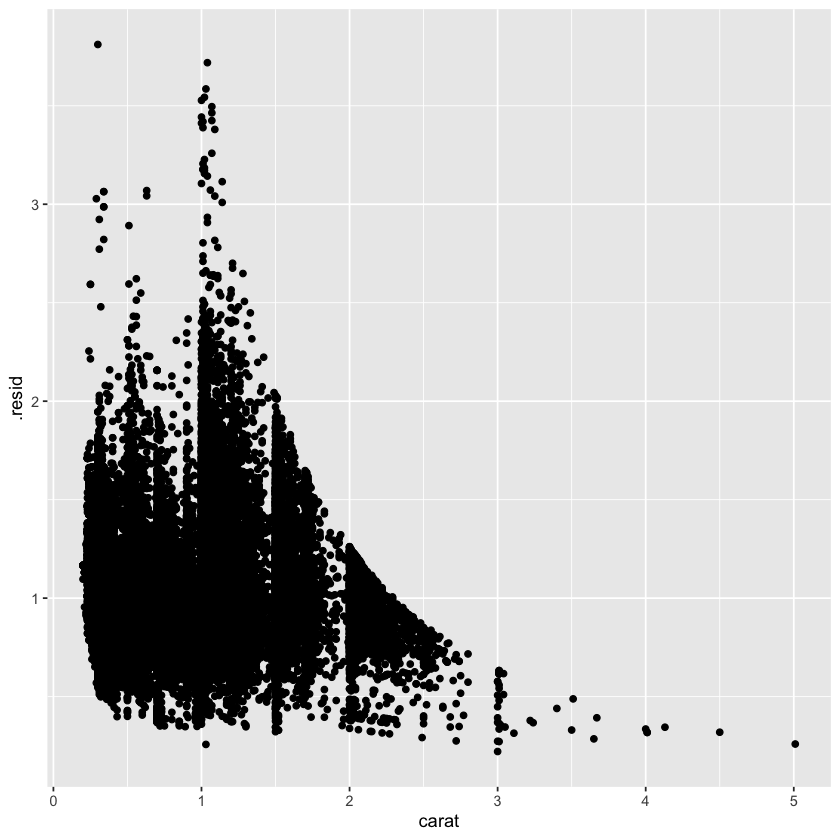

In [32]:
ggplot(diamonds_aug) + 
  geom_point(aes(x = carat, y = .resid))

* After removing the relationship between carat and price, we can see the **relationship is relative to their size**.

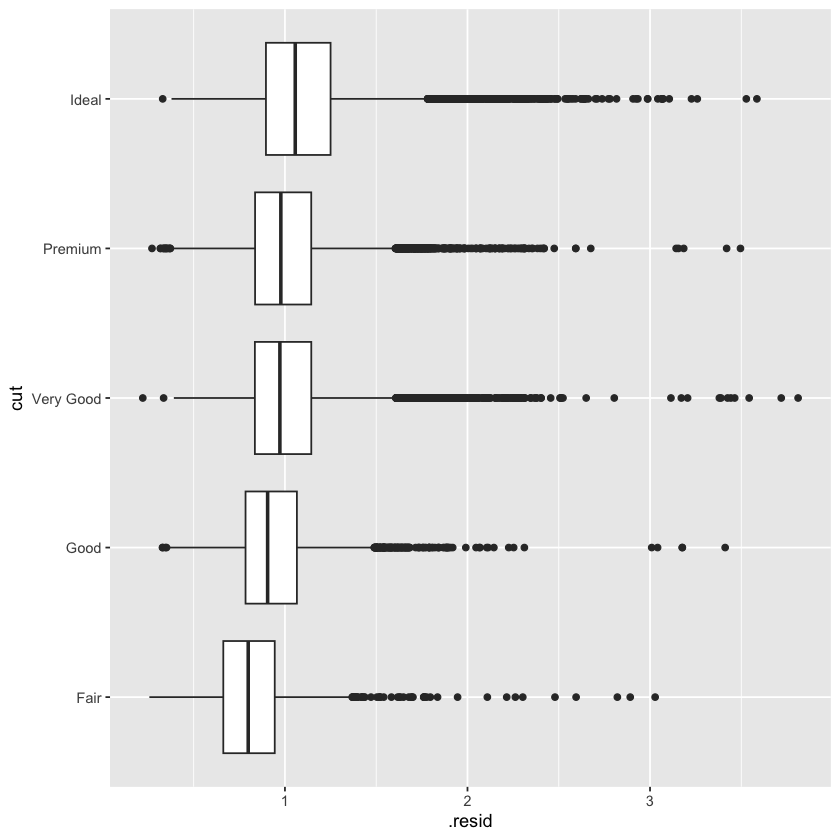

In [33]:
ggplot(diamonds_aug) + 
    geom_boxplot(aes(x = cut, y = .resid)) + 
    coord_flip()

After removing the relationship between carat and price, we can see that **better quality diamonds are more expensive.**